In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("iris_dataset.csv")

In [3]:
df.dropna()

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class_name    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#seperate dataset with class_name
X = df.iloc[:,:4]
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [6]:
Y = df.iloc[:,4]
print(Y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class_name, Length: 150, dtype: object


In [10]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state= 40)

In [11]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3, random_state=0)

clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [12]:
y_pred = clf.predict(x_test)

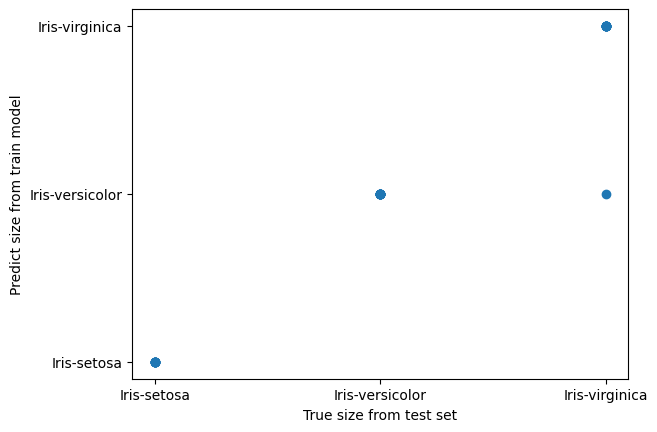

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True size from test set')
plt.ylabel('Predict size from train model')
plt.savefig('predict.pdf')
plt.show()

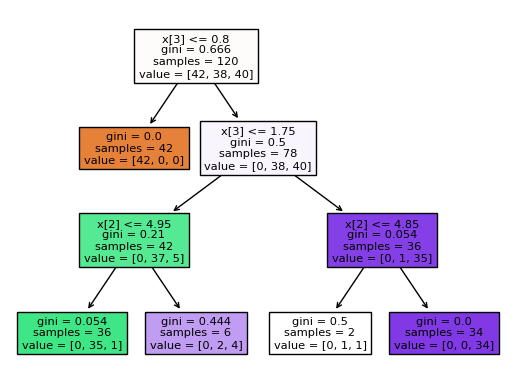

In [16]:
tree.plot_tree(clf, filled=True)
plt.savefig('Tree_Classification.pdf')
plt.show()

In [17]:
feat_importance = clf.feature_importances_

In [18]:
print("feat_importance = ", str(feat_importance))

feat_importance =  [0.         0.         0.06919676 0.93080324]


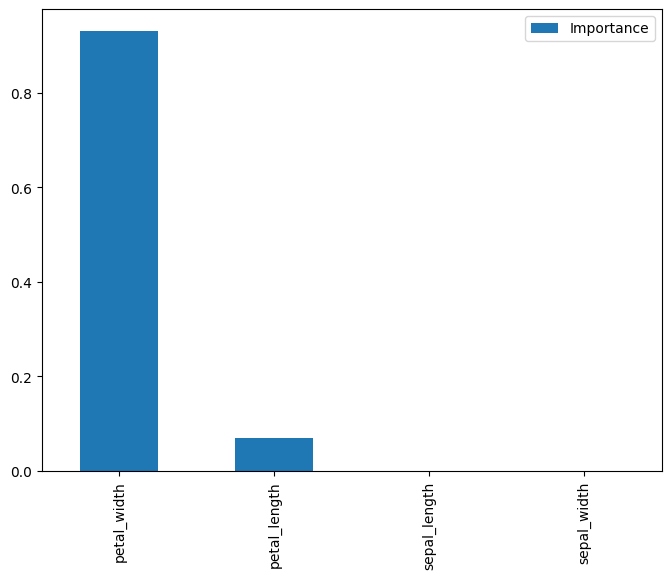

In [19]:
feat_importance =   pd.DataFrame(clf.feature_importances_, index= X.columns, columns= ["Importance"])
feat_importance.sort_values(by= "Importance", ascending=False, inplace= True)
feat_importance.plot(kind= 'bar', figsize=(8,6))
plt.savefig('Importance.pdf')

In [ ]:
train_err = []
test_err = []
for k, depth in enumerate(range(1, 10)):